In [1]:
import sys
import os
sys.path.append('.\\neurokin\\')
#import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from neurokin.kinematic_data import KinematicDataRun
from neurokin.neural_data import NeuralData
from neurokin.utils.neural import processing, neural_plot

## Experiment settings and runs to analyze

In [3]:
GAIT_PATH = "./neurokin/test_data/"
NEURAL_PATH = "./temp_data/neural/220915/ENWE_00052-220915-153059/"
CONFIGPATH = "./config.yaml"
GAIT_RECORDING_FS = 200
output_folder = "./"

## Reference markers and correction parameters.

The axis can be tilted or shifted (tilting of the runway, setting the origin in the middle..) so we set one reference marker on which to compute the linear trend of the tilt, and one for the shifting, then indicate all the columns that should be corrected for either. 

Finally we set which markers should be use to partition the steps.

In [4]:
shift_reference_marker = "lmtp_y"
tilt_reference_marker = "lmtp_z"
to_tilt = ["rshoulder_z", "rcrest_z", "rhip_z",
           "rknee_z", "rankle_z", "rmtp_z",
           "lshoulder_z", "lcrest_z", "lhip_z",
           "lknee_z", "lankle_z", "lmtp_z"]
to_shift = ["rshoulder_y", "rcrest_y", "rhip_y",
            "rknee_y", "rankle_y", "rmtp_y",
            "lshoulder_y", "lcrest_y", "lhip_y",
            "lknee_y", "lankle_y", "lmtp_y"]

step_left_marker = "lmtp"
step_right_marker = "rmtp"

## Get file names
Running through the selected folder to grab the names of all the .c3d files

In [5]:
c3d_files = []
for file in os.listdir(GAIT_PATH):
    if file.endswith(".c3d"):
        c3d_files.append(GAIT_PATH + file)
file = c3d_files[0]

## Here is where the magic happens.

- Runs through the files to analyze
- creates an object for each run, corrects the tilt and the shift
- computes the gait cycles bounds and prints it to a file for inspection
- computes all the angle joints set in the config file
- saves to csv

In [6]:
kin_data = KinematicDataRun(file, CONFIGPATH)       # creating a single run obj
kin_data.load_kinematics()

kin_data.compute_gait_cycles_bounds(left_marker=step_left_marker,   # computing left right bounds of steps
                                    right_marker=step_right_marker)
kin_data.print_step_partition(step_left_marker, step_right_marker, output_folder)  # print step partition for inspection only



(<AxesSubplot:title={'center':'Left side'}>,
 <AxesSubplot:title={'center':'Right side'}>)

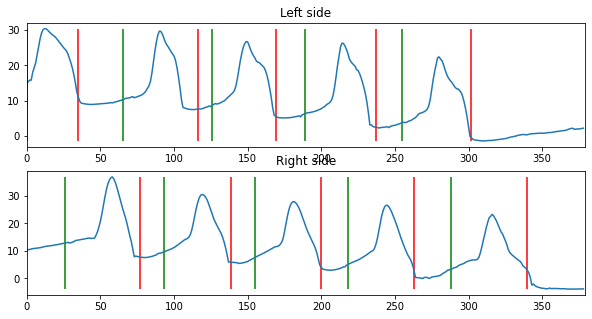

In [7]:
fig, axs = plt.subplots(2,1, figsize=(10,5))
kin_data.plot_step_partition(step_left_marker, step_right_marker, ax_l=axs[0], ax_r=axs[1])

## Example for `FeatureExtraction` subclass:

(implementation in KinematicDataRun pending)

In [8]:
from neurokin.features.extraction_strategies import SampleFeatureExtractionStrategy

In [9]:
# as the implementation in the KinematicDataRun class is still pending:
df = kin_data.markers_df.copy()

In [10]:
# without passing any params, defaults will be used:
feature_extraction_strat = SampleFeatureExtractionStrategy(sliced_marker_df=df)
extracted_features_df = feature_extraction_strat.extract_features(source_marker_ids=['lshoulder', 'rmtp'])
extracted_features_df.head(10)

scorer            scorer                                               \
bodyparts      lshoulder                                         rmtp   
coords    x_sliding_mean y_sliding_mean z_sliding_mean x_sliding_mean   
0                    NaN            NaN            NaN            NaN   
1                    NaN            NaN            NaN            NaN   
2                    NaN            NaN            NaN            NaN   
3                    NaN            NaN            NaN            NaN   
4              90.532173    -318.734680      64.737143     125.497142   
5              90.646272    -317.272498      64.595953     125.525832   
6              90.743596    -315.816461      64.449585     125.548643   
7              90.831175    -314.391022      64.301680     125.563626   
8              90.897980    -312.976318      64.148067     125.524994   
9              91.015179    -311.578857      64.005305     125.482463   

scorer                                   
bodyparts                                
coords    y_sliding_mean z_sliding_mean  
0                    NaN            NaN  
1                    NaN            NaN  
2                    NaN            NaN  
3                    NaN            NaN  
4            -436.843005      10.565651  
5            -436.720563      10.671446  
6            -436.587933      10.772614  
7            -436.454626      10.879819  
8            -436.361664      10.956066  
9            -436.269489      11.024198

In [11]:
# with user adjusted params:
params = {'window_size': 3, 'aggregation_method': 'sum'}
feature_extraction_strat = SampleFeatureExtractionStrategy(sliced_marker_df=df, params = params)
extracted_features_df = feature_extraction_strat.extract_features(source_marker_ids=['lshoulder', 'rmtp'])
extracted_features_df.head(10)

scorer           scorer                                            \
bodyparts     lshoulder                                      rmtp   
coords    x_sliding_sum y_sliding_sum z_sliding_sum x_sliding_sum   
0                   NaN           NaN           NaN           NaN   
1                   NaN           NaN           NaN           NaN   
2            271.340942   -960.630005    194.682266    376.413872   
3            271.769157   -956.187042    194.253479    376.472450   
4            271.896088   -951.734375    193.756256    376.563171   
5            272.196266   -947.422760    193.343719    376.670296   
6            272.407753   -943.144012    192.877686    376.738297   
7            272.835953   -938.911713    192.504951    376.746292   
8            273.027695   -934.706146    192.014046    376.468262   
9            273.254005   -930.546356    191.534859    376.232269   

scorer                                 
bodyparts                              
coords    y_sliding_sum z_sliding_sum  
0                   NaN           NaN  
1                   NaN           NaN  
2          -1310.957916     31.321128  
3          -1310.606537     31.654674  
4          -1310.164368     32.019515  
5          -1309.697052     32.393255  
6          -1309.331635     32.659982  
7          -1309.016022     32.891967  
8          -1308.812042     33.077775  
9          -1308.572144     33.277434

In [12]:
# with invalid params:
params = {'window_size': 3.4}
feature_extraction_strat = SampleFeatureExtractionStrategy(sliced_marker_df=df, params = params)
extracted_features_df = feature_extraction_strat.extract_features(source_marker_ids=['lshoulder', 'rmtp'])
extracted_features_df.head(10)

AssertionError: input_params[window_size] has to be one of the following types: [<class 'int'>].However, you passed: 3.4, which is of type: <class 'float'>

# Neural analysis

The basics: *NeuralData*


In [11]:
neural_data = NeuralData(path=NEURAL_PATH)
neural_data.load_tdt_data(stream_name="NPr1", sync_present=True, stim_stream_name="Wav1")
neural_data.pick_sync_data(0)

FileNotFoundError: [Errno 2] No such file or directory: './temp_data/neural/220915/ENWE_00052-220915-153059/'

In [ ]:
MIN_FOI = 10


MIN_POINTS = int(neural_data.fs * 1/(MIN_FOI/2))
POWER = MIN_POINTS.bit_length()
NFFT = 2**(POWER+2)


In [ ]:
%matplotlib inline

In [ ]:
nfft= 2**13
NOV = nfft/8
freq, pxx = processing.calculate_power_spectral_density(neural_data.raw[5], neural_data.fs, 
                                                        nperseg=nfft, noverlap=NOV,
                                                        scaling="spectrum")
fig, ax = plt.subplots(figsize=(5,5))
fig.suptitle("A1 Caudal Forelimb Left", fontsize=20)

ax.set_xlim(0,300)
ax.set_ylim(0, 0.6*10**-7)

ax.plot(freq, pxx, linewidth=3)

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(10,10))

kin_data.plot_step_partition(step_left_marker, step_right_marker, ax_l=axs[0], ax_r=axs[1])
neural_plot.plot_spectrogram(ax=axs[2], fs=neural_data.fs, raw=neural_data.raw[5], ylim=[0,300], 
                             tick_spacing=50, nfft=nfft, noverlap=NOV)



fig.suptitle("Kinematic and Neural Correlation", fontsize=15)